In [1]:
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
from googleapiclient.discovery import build
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from translate import Translator
import re
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Desarrollo05\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Desarrollo05\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Desarrollo05\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Desarrollo05\AppData\Roaming\nltk_data..
[nltk_data]    |     .
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Desarrollo05\AppData\Roaming\nltk_data..
[nltk_

In [2]:
# Función para traducir a inglés
def translate_to_english(text, lang_from='es'):
    try:
        translator = Translator(to_lang='en', from_lang=lang_from)
        return translator.translate(text)
    except Exception as e:
        print(f"Error en la traducción: {e}")
        return text

# Funciones de limpieza de texto
def complete_clean(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [5]:
# Configuración de YouTube API
youtube = build("youtube", "v3", developerKey="API_KEY")

In [6]:
# Obtener comentarios de YouTube
comments = []
page_token = None
while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId="zX_4JbCsAQg",
        maxResults=100,
        pageToken=page_token
    )
    response = request.execute()
    comments.extend([item['snippet']['topLevelComment']['snippet']['textOriginal'] for item in response['items']])
    page_token = response.get('nextPageToken')
    if not page_token:
        break

In [7]:
# Limpieza de comentarios
clean_comments = [complete_clean(comment) for comment in comments]
clean_comments = [' '.join(comment) if isinstance(comment, list) else comment for comment in clean_comments]

In [9]:
# Traducción de comentarios al inglés
translated_comments = [translate_to_english(comment) for comment in clean_comments]

In [10]:
# Análisis de sentimiento
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(comment) for comment in translated_comments]

In [11]:
# Visualización
df = pd.DataFrame(sentiments)
print(df)

      neg    neu    pos  compound
0   0.000  0.613  0.387    0.8481
1   0.000  0.208  0.792    0.5859
2   0.000  0.000  1.000    0.6249
3   0.000  0.494  0.506    0.6249
4   0.000  0.798  0.202    0.7964
5   0.186  0.556  0.258    0.2960
6   0.000  0.558  0.442    0.7463
7   0.000  0.316  0.684    0.7574
8   0.000  0.386  0.614    0.7474
9   0.000  0.477  0.523    0.9213
10  0.091  0.859  0.049   -0.1531
11  0.000  1.000  0.000    0.0000
12  0.000  0.430  0.570    0.6486
13  0.000  0.527  0.473    0.6590
14  0.000  0.772  0.228    0.7351
15  0.000  0.598  0.402    0.8553
16  0.000  1.000  0.000    0.0000
17  0.000  0.839  0.161    0.3612
18  0.000  1.000  0.000    0.0000
19  0.000  0.580  0.420    0.4404
20  0.000  0.661  0.339    0.8957
21  0.000  0.452  0.548    0.9410
22  0.000  0.652  0.348    0.7506
23  0.000  0.714  0.286    0.3400
24  0.000  0.524  0.476    0.8442
25  0.000  0.923  0.077    0.1901
26  0.000  0.270  0.730    0.6597
27  0.000  0.355  0.645    0.8442
28  0.000  0.4

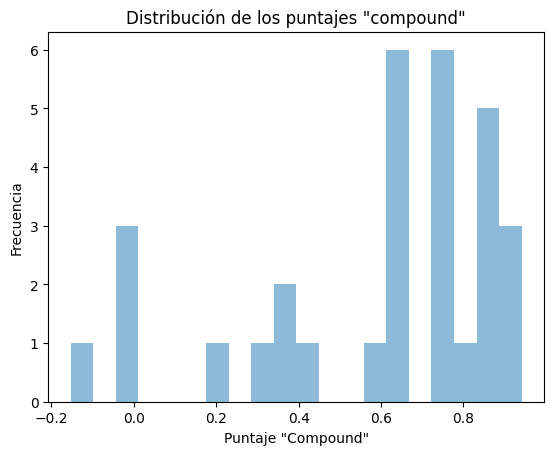

In [12]:
# Distribución de los puntajes "compound"
compound_scores = [item['compound'] for item in sentiments]
plt.hist(compound_scores, bins=20, alpha=0.5)
plt.title('Distribución de los puntajes "compound"')
plt.xlabel('Puntaje "Compound"')
plt.ylabel('Frecuencia')
plt.show()